In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("atlanta_9-24-2016_9-30-2017.csv")
df = df.dropna(axis=1)
df['Origin']

0           MICHIGAN
1           MICHIGAN
2           MICHIGAN
3           MICHIGAN
4           MICHIGAN
5           MICHIGAN
6           MICHIGAN
7           MICHIGAN
8           MICHIGAN
9           MICHIGAN
10          MICHIGAN
11          MICHIGAN
12           ALABAMA
13          MICHIGAN
14          MICHIGAN
15          MICHIGAN
16          MICHIGAN
17           ALABAMA
18          MICHIGAN
19          MICHIGAN
20          MICHIGAN
21          MICHIGAN
22           ALABAMA
23          MICHIGAN
24          MICHIGAN
25          MICHIGAN
26          MICHIGAN
27           ALABAMA
28          MICHIGAN
29          MICHIGAN
30          MICHIGAN
31          MICHIGAN
32            CANADA
33          MICHIGAN
34         TENNESSEE
35          MICHIGAN
36          MICHIGAN
37          MICHIGAN
38          MICHIGAN
39    NORTH CAROLINA
40    NORTH CAROLINA
41    NORTH CAROLINA
42    NORTH CAROLINA
43    NORTH CAROLINA
44    NORTH CAROLINA
45    NORTH CAROLINA
46    NORTH CAROLINA
47    NORTH C

In [3]:
encoder = LabelEncoder()
df['Origin'] = encoder.fit_transform(df['Origin'])
df['Commodity Name'] = encoder.fit_transform(df['Commodity Name'])
df['City Name'] = encoder.fit_transform(df['City Name'])
df['Package'] = encoder.fit_transform(df['Package'])
df['Variety'] = encoder.fit_transform(df['Variety'])
df['Date'] = encoder.fit_transform(df['Date'])
df['Repack'] = encoder.fit_transform(df['Repack'])

In [4]:
x = df.iloc[:, :10]
y = df.iloc[:, 10]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [6]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [7]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred = nb_classifier.predict(x_test)

In [8]:
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score * 100)

Accuracy: 100.0


In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12]])

<function matplotlib.pyplot.show(close=None, block=None)>

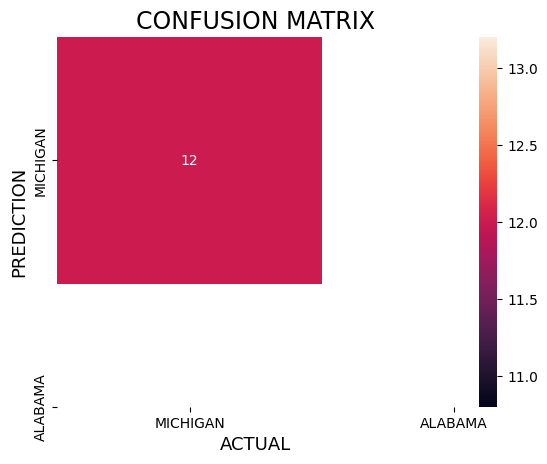

In [10]:
sns.heatmap(cm,annot=True,fmt ='g',xticklabels = ['MICHIGAN','ALABAMA'],yticklabels = ['MICHIGAN','ALABAMA'])
plt.ylabel('PREDICTION',fontsize=13)
plt.xlabel('ACTUAL',fontsize=13)
plt.title('CONFUSION MATRIX',fontsize=17)
plt.show